
**1. Introduction:**
   - Provide background information on the project's objective, which is to develop a credit risk model using LightGBM.
   - Explain the significance of credit risk modeling in financial institutions for assessing the likelihood of default by borrowers.
   - Introduce the dataset used for training the model, highlighting its relevance to the problem statement.
   - Briefly outline the main steps involved in the project, such as data preprocessing, feature engineering, model selection, and evaluation.

**2. Methodology:**
   - **Data Collection and Preprocessing:**
     - Describe the source of the dataset and any data cleaning steps performed to handle missing values or outliers.
   - **Feature Engineering Techniques:**
     - Explain the process of creating new features or transforming existing ones to improve model performance.
   - **Model Selection: LightGBM Classifier:**
     - Justify the choice of LightGBM as the primary modeling algorithm, highlighting its advantages for handling large datasets and categorical features.
   - **Cross-Validation Strategy: Stratified Group K-Fold:**
     - Provide rationale for using Stratified Group K-Fold cross-validation to ensure balanced splits while preserving temporal or group information in the data.
   - **Training Process and Hyperparameter Tuning:**
     - Detail the training process of the LightGBM model, including hyperparameter tuning techniques such as grid search or random search.
   - **Evaluation Metrics: AUC Score:**
     - Define the Area Under the ROC Curve (AUC) as the primary evaluation metric for assessing model performance on binary classification tasks.
   - **Ensemble Modeling Approach: Voting Model:**
     - Explain the concept of ensemble learning and the implementation of a Voting Model to combine predictions from multiple LightGBM models.

**3. Results:**
   - **Performance Evaluation on Validation Set:**
     - Present the AUC scores achieved by each fold of the cross-validation process and discuss any variations observed.
   - **Feature Importance Analysis:**
     - Visualize and discuss the importance of features derived from the LightGBM models, highlighting key predictors of credit risk.
   - **Model Comparison and Selection of the Best Model:**
     - Compare the performance of individual LightGBM models and the ensemble Voting Model to select the best-performing model.
   - **Discussion on the Significance of Key Features:**
     - Interpret the impact of key features identified by the model on predicting credit risk and their potential implications for decision-making.

**4. Discussion:**
   - **Interpretation of Results:**
     - Provide insights into the findings from the modeling process and their alignment with domain knowledge.
   - **Potential Business Implications:**
     - Discuss how the developed credit risk model can be utilized by financial institutions to optimize lending decisions and mitigate risks.
   - **Limitations of the Study:**
     - Acknowledge any limitations or constraints encountered during the project, such as data quality issues or assumptions made.
   - **Future Work and Possible Improvements:**
     - Suggest areas for future research or enhancements to the credit risk model, such as incorporating additional data sources or exploring alternative modeling techniques.

**5. Conclusion:**
   - **Summary of Findings:**
     - Recap the key findings and outcomes of the project, emphasizing the effectiveness of the developed credit risk model.
   - **Overall Conclusions Drawn from the Project:**
     - Summarize the project's contributions to addressing the problem of credit risk assessment and its implications for stakeholders.
   - **Final Thoughts and Recommendations:**
     - Provide concluding remarks on the significance of the project and offer recommendations for further action or decision-making based on the results obtained.



Here's a step-by-step guide on how to proceed:

1. **Install Required Libraries:**
   - Make sure you have Python installed on your system. You can download and install Python from the official website: [python.org](https://www.python.org/).
   - Use pip, Python's package installer, to install the required libraries. You can do this by running the following command in your terminal or command prompt:
     ```
     pip install polars lightgbm pandas seaborn matplotlib scikit-learn imbalanced-learn
     ```

2. **Download the Dataset:**
   - If the dataset is not provided in the code snippet, you'll need to obtain it separately. Ensure that you have access to the dataset or replace the paths with the correct locations of your dataset files.

3. **Run the Code:**
   - Copy the provided code into a Python script file (with a .py extension) or a Jupyter Notebook.
   - Update any file paths or configurations as needed to match your directory structure or dataset location.
   - Execute the script or notebook cells to run the code.

4. **Review Output:**
   - After running the code, review the output, which may include visualizations, performance metrics, or saved files such as CSVs containing model predictions.

5. **Troubleshooting:**
   - If you encounter any errors during execution, carefully read the error messages to identify the issue. Common issues may include missing dependencies, incorrect file paths, or incompatible data types.



In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/home-credit-credit-risk-model-stability/sample_submission.csv
/kaggle/input/home-credit-credit-risk-model-stability/feature_definitions.csv
/kaggle/input/home-credit-credit-risk-model-stability/parquet_files/test/test_deposit_1.parquet
/kaggle/input/home-credit-credit-risk-model-stability/parquet_files/test/test_applprev_2.parquet
/kaggle/input/home-credit-credit-risk-model-stability/parquet_files/test/test_static_cb_0.parquet
/kaggle/input/home-credit-credit-risk-model-stability/parquet_files/test/test_static_0_0.parquet
/kaggle/input/home-credit-credit-risk-model-stability/parquet_files/test/test_credit_bureau_a_1_3.parquet
/kaggle/input/home-credit-credit-risk-model-stability/parquet_files/test/test_credit_bureau_a_1_2.parquet
/kaggle/input/home-credit-credit-risk-model-stability/parquet_files/test/test_tax_registry_b_1.parquet
/kaggle/input/home-credit-credit-risk-model-stability/parquet_files/test/test_static_0_2.parquet
/kaggle/input/home-credit-credit-risk-model-st

In [2]:
import os  # Importing the os module for operating system functionalities
import gc  # Importing the gc module for garbage collection
from glob import glob  # Importing the glob function from the glob module for file path expansion
from pathlib import Path  # Importing the Path class from the pathlib module for working with file paths
from datetime import datetime  # Importing the datetime class from the datetime module for working with dates and times

import numpy as np  # Importing numpy library as np for numerical computing
import pandas as pd  # Importing pandas library as pd for data manipulation and analysis
import polars as pl  # Importing polars library as pl for data manipulation and analysis

import matplotlib.pyplot as plt  # Importing pyplot module from matplotlib library for creating visualizations
import seaborn as sns  # Importing seaborn library for statistical data visualization

from sklearn.model_selection import TimeSeriesSplit, GroupKFold, StratifiedGroupKFold  # Importing classes for cross-validation strategies
from sklearn.base import BaseEstimator, RegressorMixin  # Importing base classes for creating custom estimators

import joblib  # Importing joblib library for saving and loading models

import lightgbm as lgb  # Importing LightGBM library for gradient boosting framework

import warnings  # Importing warnings module for handling warnings
warnings.simplefilter(action='ignore', category=FutureWarning)  # Ignoring FutureWarning to avoid cluttering output

In [3]:
import sys  # Importing the sys module for system-specific parameters and functions
from pathlib import Path  # Importing the Path class from the pathlib module for working with file paths
import subprocess  # Importing the subprocess module for spawning new processes
import os  # Importing the os module for operating system functionalities
import gc  # Importing the gc module for garbage collection
from glob import glob  # Importing the glob function from the glob module for file path expansion

import numpy as np  # Importing numpy library as np for numerical computing
import pandas as pd  # Importing pandas library as pd for data manipulation and analysis
import polars as pl  # Importing polars library as pl for data manipulation and analysis
from datetime import datetime  # Importing the datetime class from the datetime module for working with dates and times
import seaborn as sns  # Importing seaborn library for statistical data visualization
import matplotlib.pyplot as plt  # Importing pyplot module from matplotlib library for creating visualizations

import warnings  # Importing warnings module for handling warnings
warnings.filterwarnings('ignore')  # Ignoring warnings to avoid cluttering output

ROOT = '/kaggle/input/home-credit-credit-risk-model-stability'  # Defining ROOT as the root directory path

In [4]:
from sklearn.model_selection import TimeSeriesSplit, GroupKFold, StratifiedGroupKFold  # Importing classes for cross-validation strategies
from sklearn.base import BaseEstimator, RegressorMixin  # Importing base classes for creating custom estimators
from sklearn.metrics import roc_auc_score  # Importing the roc_auc_score function for evaluating model performance
import lightgbm as lgb  # Importing LightGBM library for gradient boosting framework

from imblearn.over_sampling import SMOTE  # Importing SMOTE from imbalanced-learn library for oversampling
from sklearn.preprocessing import OrdinalEncoder  # Importing OrdinalEncoder from scikit-learn for encoding categorical features
from sklearn.impute import KNNImputer  # Importing KNNImputer from scikit-learn for imputing missing values using K-nearest neighbors

In [5]:
class Pipeline:
    @staticmethod
    def set_table_dtypes(df):  # Set table data types
        for col in df.columns:
            if col in ["case_id", "WEEK_NUM", "num_group1", "num_group2"]:
                df = df.with_columns(pl.col(col).cast(pl.Int64))  # Cast columns to Int64
            elif col in ["date_decision"]:
                df = df.with_columns(pl.col(col).cast(pl.Date))  # Cast columns to Date
            elif col[-1] in ("P", "A"):
                df = df.with_columns(pl.col(col).cast(pl.Float64))  # Cast columns to Float64
            elif col[-1] in ("M",):
                df = df.with_columns(pl.col(col).cast(pl.String))  # Cast columns to String
            elif col[-1] in ("D",):
                df = df.with_columns(pl.col(col).cast(pl.Date))  # Cast columns to Date
        return df

    @staticmethod
    def handle_dates(df):  # Handle dates
        for col in df.columns:
            if col[-1] in ("D",):
                df = df.with_columns(pl.col(col) - pl.col("date_decision"))  # Calculate time difference
                df = df.with_columns(pl.col(col).dt.total_days())  # Extract total days
        df = df.drop("date_decision", "MONTH")  # Drop unnecessary columns
        return df

    @staticmethod
    def filter_cols(df):  # Filter columns
        for col in df.columns:
            if col not in ["target", "case_id", "WEEK_NUM"]:
                isnull = df[col].is_null().mean()
                if isnull > 0.7:
                    df = df.drop(col)  # Drop columns with high null percentage
        
        for col in df.columns:
            if (col not in ["target", "case_id", "WEEK_NUM"]) & (df[col].dtype == pl.String):
                freq = df[col].n_unique()
                if (freq == 1) | (freq > 200):
                    df = df.drop(col)  # Drop columns with low variability or too many unique values
        return df

class Aggregator:
    
    @staticmethod
    def num_expr(df):  # Numerical expressions
        cols = [col for col in df.columns if col[-1] in ("P", "A")]
        expr_max = [pl.max(col).alias(f"max_{col}") for col in cols]  # Aggregate maximum values
        return expr_max
    
    @staticmethod
    def date_expr(df):  # Date expressions
        cols = [col for col in df.columns if col[-1] in ("D")]
        expr_max = [pl.max(col).alias(f"max_{col}") for col in cols]  # Aggregate maximum values
        return expr_max
    
    @staticmethod
    def str_expr(df):  # String expressions
        cols = [col for col in df.columns if col[-1] in ("M",)]
        expr_max = [pl.max(col).alias(f"max_{col}") for col in cols]  # Aggregate maximum values
        return expr_max
    
    @staticmethod
    def other_expr(df):  # Other expressions
        cols = [col for col in df.columns if col[-1] in ("T", "L")]
        expr_max = [pl.max(col).alias(f"max_{col}") for col in cols]  # Aggregate maximum values
        return expr_max
    
    @staticmethod
    def count_expr(df):  # Count expressions
        cols = [col for col in df.columns if "num_group" in col]
        expr_max = [pl.max(col).alias(f"max_{col}") for col in cols]  # Aggregate maximum values
        return expr_max
    
    @staticmethod
    def get_exprs(df):  # Get expressions
        exprs = Aggregator.num_expr(df) + \
                Aggregator.date_expr(df) + \
                Aggregator.str_expr(df) + \
                Aggregator.other_expr(df) + \
                Aggregator.count_expr(df)  # Concatenate expressions
        return exprs

In [6]:
def read_file(path, depth=None):
    """
    Read a Parquet file and perform data preprocessing.

    Args:
        path (str): Path to the Parquet file.
        depth (int, optional): Depth of aggregation. Defaults to None.

    Returns:
        pl.DataFrame: Preprocessed DataFrame.
    """
    df = pl.read_parquet(path)  # Read Parquet file
    df = df.pipe(Pipeline.set_table_dtypes)  # Set table data types
    if depth in [1, 2]:
        df = df.group_by("case_id").agg(Aggregator.get_exprs(df))  # Aggregate data
    return df

def read_files(regex_path, depth=None):
    """
    Read multiple Parquet files matching a regex pattern and perform data preprocessing.

    Args:
        regex_path (str): Regular expression pattern for file paths.
        depth (int, optional): Depth of aggregation. Defaults to None.

    Returns:
        pl.DataFrame: Concatenated and preprocessed DataFrame.
    """
    chunks = []
    
    for path in glob(str(regex_path)):
        df = pl.read_parquet(path)  # Read Parquet file
        df = df.pipe(Pipeline.set_table_dtypes)  # Set table data types
        if depth in [1, 2]:
            df = df.group_by("case_id").agg(Aggregator.get_exprs(df))  # Aggregate data
        chunks.append(df)
    
    df = pl.concat(chunks, how="vertical_relaxed")  # Concatenate DataFrames
    df = df.unique(subset=["case_id"])  # Remove duplicate case_ids
    return df

def feature_eng(df_base, depth_0, depth_1, depth_2):
    """
    Perform feature engineering on a base DataFrame.

    Args:
        df_base (pl.DataFrame): Base DataFrame.
        depth_0 (list): List of DataFrames for depth 0 aggregation.
        depth_1 (list): List of DataFrames for depth 1 aggregation.
        depth_2 (list): List of DataFrames for depth 2 aggregation.

    Returns:
        pl.DataFrame: DataFrame with engineered features.
    """
    df_base = (
        df_base
        .with_columns(
            month_decision=pl.col("date_decision").dt.month(),
            weekday_decision=pl.col("date_decision").dt.weekday(),
        )
    )
    for i, df in enumerate(depth_0 + depth_1 + depth_2):
        df_base = df_base.join(df, how="left", on="case_id", suffix=f"_{i}")  # Join DataFrames
    df_base = df_base.pipe(Pipeline.handle_dates)  # Handle dates
    return df_base

def to_pandas(df_data, cat_cols=None):
    """
    Convert DataFrame to Pandas DataFrame and perform type conversion.

    Args:
        df_data (pl.DataFrame): DataFrame to convert.
        cat_cols (list, optional): List of categorical columns. Defaults to None.

    Returns:
        pd.DataFrame: Pandas DataFrame.
        list: List of categorical columns.
    """
    df_data = df_data.to_pandas()  # Convert DataFrame to Pandas DataFrame
    if cat_cols is None:
        cat_cols = list(df_data.select_dtypes("object").columns)  # Select categorical columns
    df_data[cat_cols] = df_data[cat_cols].astype("category")  # Convert categorical columns to category type
    return df_data, cat_cols

In [7]:
ROOT = Path("/kaggle/input/home-credit-credit-risk-model-stability")  # Define root directory path
TRAIN_DIR = ROOT / "parquet_files" / "train"  # Define train directory path
TEST_DIR = ROOT / "parquet_files" / "test"  # Define test directory path

In [8]:
data_store = {
    "df_base": read_file(TRAIN_DIR / "train_base.parquet"),  # Read base DataFrame
    "depth_0": [
        read_file(TRAIN_DIR / "train_static_cb_0.parquet"),  # Read depth 0 DataFrame
        read_files(TRAIN_DIR / "train_static_0_*.parquet"),  # Read multiple depth 0 DataFrames
    ],
    "depth_1": [
        read_files(TRAIN_DIR / "train_applprev_1_*.parquet", 1),  # Read multiple depth 1 DataFrames
        read_file(TRAIN_DIR / "train_tax_registry_a_1.parquet", 1),  # Read depth 1 DataFrame
        read_file(TRAIN_DIR / "train_tax_registry_b_1.parquet", 1),  # Read depth 1 DataFrame
        read_file(TRAIN_DIR / "train_tax_registry_c_1.parquet", 1),  # Read depth 1 DataFrame
        read_files(TRAIN_DIR / "train_credit_bureau_a_1_*.parquet", 1),  # Read multiple depth 1 DataFrames
        read_file(TRAIN_DIR / "train_credit_bureau_b_1.parquet", 1),  # Read depth 1 DataFrame
        read_file(TRAIN_DIR / "train_other_1.parquet", 1),  # Read depth 1 DataFrame
        read_file(TRAIN_DIR / "train_person_1.parquet", 1),  # Read depth 1 DataFrame
        read_file(TRAIN_DIR / "train_deposit_1.parquet", 1),  # Read depth 1 DataFrame
        read_file(TRAIN_DIR / "train_debitcard_1.parquet", 1),  # Read depth 1 DataFrame
    ],
    "depth_2": [
        read_file(TRAIN_DIR / "train_credit_bureau_b_2.parquet", 2),  # Read depth 2 DataFrame
        read_files(TRAIN_DIR / "train_credit_bureau_a_2_*.parquet", 2),  # Read multiple depth 2 DataFrames
        read_file(TRAIN_DIR / "train_applprev_2.parquet", 2),  # Read depth 2 DataFrame
        read_file(TRAIN_DIR / "train_person_2.parquet", 2)  # Read depth 2 DataFrame
    ]
}

df_train = feature_eng(**data_store)  # Perform feature engineering
print("train data shape:\t", df_train.shape)  # Print shape of train data

train data shape:	 (1526659, 487)


In [9]:
data_store = {
    "df_base": read_file(TEST_DIR / "test_base.parquet"),  # Read base DataFrame
    "depth_0": [
        read_file(TEST_DIR / "test_static_cb_0.parquet"),  # Read depth 0 DataFrame
        read_files(TEST_DIR / "test_static_0_*.parquet"),  # Read multiple depth 0 DataFrames
    ],
    "depth_1": [
        read_files(TEST_DIR / "test_applprev_1_*.parquet", 1),  # Read multiple depth 1 DataFrames
        read_file(TEST_DIR / "test_tax_registry_a_1.parquet", 1),  # Read depth 1 DataFrame
        read_file(TEST_DIR / "test_tax_registry_b_1.parquet", 1),  # Read depth 1 DataFrame
        read_file(TEST_DIR / "test_tax_registry_c_1.parquet", 1),  # Read depth 1 DataFrame
        read_files(TEST_DIR / "test_credit_bureau_a_1_*.parquet", 1),  # Read multiple depth 1 DataFrames
        read_file(TEST_DIR / "test_credit_bureau_b_1.parquet", 1),  # Read depth 1 DataFrame
        read_file(TEST_DIR / "test_other_1.parquet", 1),  # Read depth 1 DataFrame
        read_file(TEST_DIR / "test_person_1.parquet", 1),  # Read depth 1 DataFrame
        read_file(TEST_DIR / "test_deposit_1.parquet", 1),  # Read depth 1 DataFrame
        read_file(TEST_DIR / "test_debitcard_1.parquet", 1),  # Read depth 1 DataFrame
    ],
    "depth_2": [
        read_file(TEST_DIR / "test_credit_bureau_b_2.parquet", 2),  # Read depth 2 DataFrame
        read_files(TEST_DIR / "test_credit_bureau_a_2_*.parquet", 2),  # Read multiple depth 2 DataFrames
        read_file(TEST_DIR / "test_applprev_2.parquet", 2),  # Read depth 2 DataFrame
        read_file(TEST_DIR / "test_person_2.parquet", 2)  # Read depth 2 DataFrame
    ]
}

In [10]:
df_test = feature_eng(**data_store)  # Perform feature engineering on test data
print("test data shape:\t", df_test.shape)  # Print shape of test data

test data shape:	 (10, 486)


In [11]:
# Drop the insignificant features from train data
df_train = df_train.pipe(Pipeline.filter_cols)

# Select columns from test data excluding the target column
df_test = df_test.select([col for col in df_train.columns if col != "target"])

print("train data shape:\t", df_train.shape)  # Print shape of train data
print("test data shape:\t", df_test.shape)  # Print shape of test data

train data shape:	 (1526659, 327)
test data shape:	 (10, 326)


In [12]:
# Convert train data to Pandas DataFrame and get categorical columns
df_train, cat_cols = to_pandas(df_train)

# Convert test data to Pandas DataFrame and get categorical columns
df_test, cat_cols = to_pandas(df_test, cat_cols)

# Delete data_store dictionary and perform garbage collection
del data_store
gc.collect()

0

In [13]:
# Display the first few rows of the train data
display(df_train.head())

# Display the first few rows of the test data
display(df_test.head())

,case_id,WEEK_NUM,target,month_decision,weekday_decision,birthdate_574D,dateofbirth_337D,days120_123L,days180_256L,days30_165L,...,max_num_group2_13,max_cacccardblochreas_147M,max_conts_type_509L,max_num_group1_14,max_num_group2_14,max_conts_role_79M,max_empls_economicalst_849M,max_empls_employer_name_740M,max_num_group1_15,max_num_group2_15
0,0,0,0,1,4,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,0,0,1,4,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,0,0,1,5,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,PRIMARY_MOBILE,1.0,1.0,NaN,NaN,NaN,NaN,NaN
3,3,0,0,1,4,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,PRIMARY_MOBILE,0.0,2.0,NaN,NaN,NaN,NaN,NaN
4,4,0,1,1,5,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,PRIMARY_MOBILE,0.0,1.0,NaN,NaN,NaN,NaN,NaN


,case_id,WEEK_NUM,month_decision,weekday_decision,birthdate_574D,dateofbirth_337D,days120_123L,days180_256L,days30_165L,days360_512L,...,max_num_group2_13,max_cacccardblochreas_147M,max_conts_type_509L,max_num_group1_14,max_num_group2_14,max_conts_role_79M,max_empls_economicalst_849M,max_empls_employer_name_740M,max_num_group1_15,max_num_group2_15
0,57543,100,5,5,NaN,-14804,2.0,4.0,1.0,8.0,...,0.0,a55475b1,PRIMARY_MOBILE,4.0,1.0,NaN,NaN,NaN,NaN,NaN
1,57549,100,1,1,NaN,-22723,6.0,9.0,3.0,12.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,57551,100,11,5,NaN,-14090,1.0,3.0,1.0,4.0,...,0.0,NaN,NaN,NaN,NaN,a55475b1,a55475b1,a55475b1,0.0,0.0
3,57552,100,11,5,NaN,-23768,2.0,2.0,0.0,5.0,...,NaN,NaN,NaN,NaN,NaN,a55475b1,a55475b1,a55475b1,0.0,0.0
4,57569,100,12,1,NaN,-26408,4.0,4.0,1.0,4.0,...,8.0,NaN,NaN,NaN,NaN,a55475b1,a55475b1,a55475b1,1.0,5.0


In [14]:
X = df_train.drop(columns=["target", "case_id", "WEEK_NUM"])
y = df_train["target"]
weeks = df_train["WEEK_NUM"]

cv = StratifiedGroupKFold(n_splits=5, shuffle=False)

params = {
    "boosting_type": "gbdt",
    "objective": "binary",
    "metric": "auc",
    "max_depth": 10,  
    "learning_rate": 0.05,
    "n_estimators": 2000,  
    "colsample_bytree": 0.8,
    "colsample_bynode": 0.8,
    "verbose": -1,
    "random_state": 42,
    "reg_alpha": 0.1,
    "reg_lambda": 10,
    "extra_trees":True,
    'num_leaves':64,
    "device": "cpu",  # Change device to CPU
    "verbose": -1,
}

fitted_models = []
cv_scores = []

for idx_train, idx_valid in cv.split(X, y, groups=weeks):
    X_train, y_train = X.iloc[idx_train], y.iloc[idx_train]
    X_valid, y_valid = X.iloc[idx_valid], y.iloc[idx_valid]
    
    model = lgb.LGBMClassifier(**params)
    model.fit(
        X_train, y_train,
        eval_set = [(X_valid, y_valid)],
        callbacks = [lgb.log_evaluation(400), lgb.early_stopping(5)] )
    fitted_models.append(model)
    
    y_pred_valid = model.predict_proba(X_valid)[:,1]
    auc_score = roc_auc_score(y_valid, y_pred_valid)
    cv_scores.append(auc_score)
    
print("CV AUC scores: ", cv_scores)
print("Maximum CV AUC score: ", max(cv_scores))


Training until validation scores don't improve for 5 rounds
[400]	valid_0's auc: 0.849883
Early stopping, best iteration is:
[547]	valid_0's auc: 0.851334
Training until validation scores don't improve for 5 rounds
[400]	valid_0's auc: 0.851921
Early stopping, best iteration is:
[482]	valid_0's auc: 0.852697
Training until validation scores don't improve for 5 rounds
[400]	valid_0's auc: 0.855657
Early stopping, best iteration is:
[562]	valid_0's auc: 0.857243
Training until validation scores don't improve for 5 rounds
[400]	valid_0's auc: 0.855248
Early stopping, best iteration is:
[564]	valid_0's auc: 0.85691
Training until validation scores don't improve for 5 rounds
[400]	valid_0's auc: 0.851209
Early stopping, best iteration is:
[559]	valid_0's auc: 0.852766
CV AUC scores:  [0.8513341018167047, 0.8526970192334073, 0.8572426487999496, 0.856910319844676, 0.8527664594019111]
Maximum CV AUC score:  0.8572426487999496


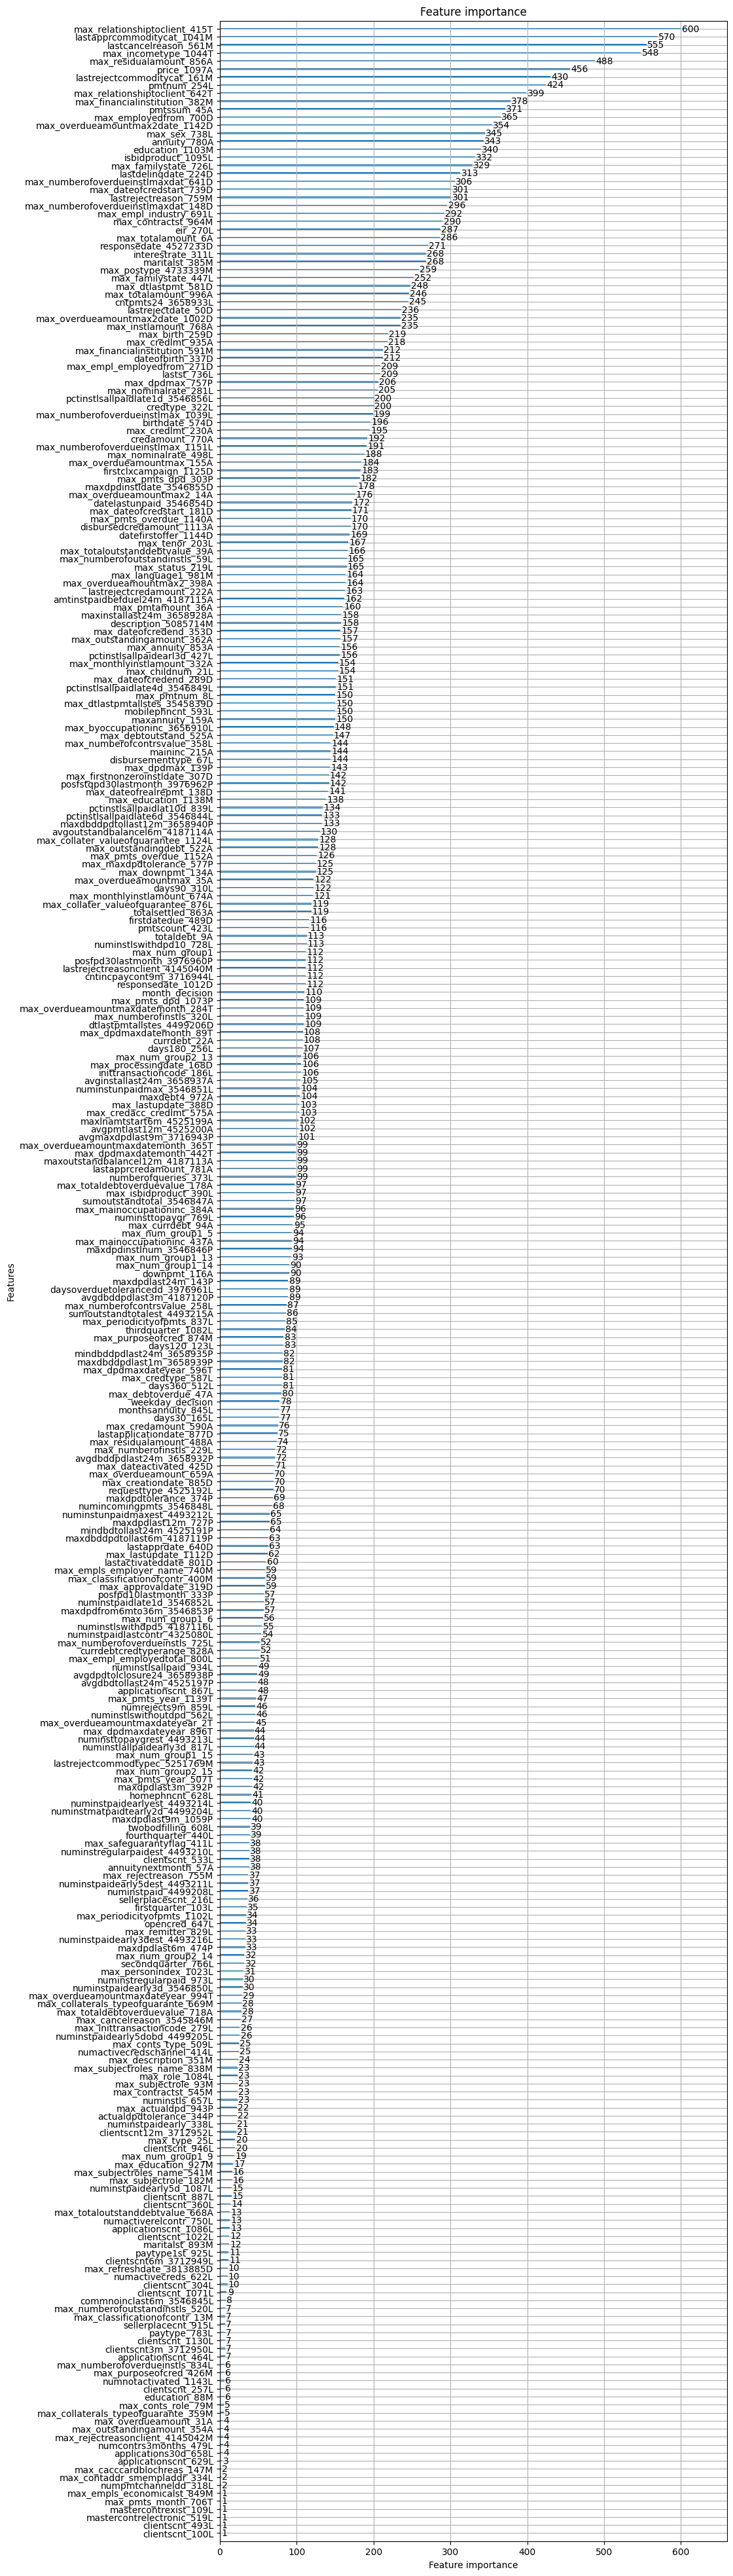

In [15]:
class VotingModel(BaseEstimator, RegressorMixin):
    """
    A custom ensemble model that averages predictions from multiple estimators.

    Args:
        estimators (list): List of estimators to be included in the ensemble.

    Attributes:
        estimators (list): List of estimators.
    """

    def __init__(self, estimators):
        super().__init__()
        self.estimators = estimators
        
    def fit(self, X, y=None):
        """
        Fit the ensemble model.

        Args:
            X (array-like): Input features.
            y (array-like, optional): Target values. Defaults to None.

        Returns:
            self: Returns an instance of self.
        """
        return self
    
    def predict(self, X):
        """
        Make predictions using the ensemble model.

        Args:
            X (array-like): Input features.

        Returns:
            array-like: Predicted target values.
        """
        y_preds = [estimator.predict(X) for estimator in self.estimators]
        return np.mean(y_preds, axis=0)
    
    def predict_proba(self, X):
        """
        Make probability predictions using the ensemble model.

        Args:
            X (array-like): Input features.

        Returns:
            array-like: Predicted probabilities.
        """
        y_preds = [estimator.predict_proba(X) for estimator in self.estimators]
        return np.mean(y_preds, axis=0)

# Instantiate the VotingModel with the fitted models
model = VotingModel(fitted_models)

# Plot feature importance of one of the fitted models
lgb.plot_importance(fitted_models[2], importance_type="split", figsize=(10,50))
plt.show()


In [16]:
# Get the column names (features)
features = X_train.columns

# Get the feature importances from the third fitted LightGBM model (index 2)
importances = fitted_models[2].feature_importances_

# Create a DataFrame to store feature importances and sort them
feature_importance = pd.DataFrame({'importance': importances, 'features': features}).sort_values('importance', ascending=False).reset_index(drop=True)

# Display the DataFrame
print(feature_importance)

     importance                             features
0           600        max_relationshiptoclient_415T
1           570           lastapprcommoditycat_1041M
2           555                lastcancelreason_561M
3           548                 max_incometype_1044T
4           488              max_residualamount_856A
..          ...                                  ...
319           0  max_collater_typofvalofguarant_298M
320           0                 max_persontype_1072L
321           0                  max_persontype_792L
322           0                deferredmnthsnum_166L
323           0                  max_pmts_month_158T

[324 rows x 2 columns]


In [17]:
drop_list = []

# Iterate over the rows of the feature importance DataFrame
for i, f in feature_importance.iterrows():
    # If the importance score is less than 80, add the feature to the drop list
    if f['importance'] < 80:
        drop_list.append(f['features'])

# Print the number of features to be dropped
print(f"Number of features which are not important: {len(drop_list)}")

Number of features which are not important: 153


In [18]:
print(drop_list)

['weekday_decision', 'days30_165L', 'monthsannuity_845L', 'max_credamount_590A', 'lastapplicationdate_877D', 'max_residualamount_488A', 'avgdbddpdlast24m_3658932P', 'max_numberofinstls_229L', 'max_dateactivated_425D', 'requesttype_4525192L', 'max_overdueamount_659A', 'max_creationdate_885D', 'maxdpdtolerance_374P', 'numincomingpmts_3546848L', 'numinstunpaidmaxest_4493212L', 'maxdpdlast12m_727P', 'mindbdtollast24m_4525191P', 'maxdbddpdtollast6m_4187119P', 'lastapprdate_640D', 'max_lastupdate_1112D', 'lastactivateddate_801D', 'max_approvaldate_319D', 'max_classificationofcontr_400M', 'max_empls_employer_name_740M', 'numinstpaidlate1d_3546852L', 'maxdpdfrom6mto36m_3546853P', 'posfpd10lastmonth_333P', 'max_num_group1_6', 'numinstlswithdpd5_4187116L', 'numinstpaidlastcontr_4325080L', 'currdebtcredtyperange_828A', 'max_numberofoverdueinstls_725L', 'max_empl_employedtotal_800L', 'avgdpdtolclosure24_3658938P', 'numinstlsallpaid_934L', 'avgdbdtollast24m_4525197P', 'applicationscnt_867L', 'max_p

In [19]:
# Drop the WEEK_NUM column from the test dataset and set case_id as the index
X_test = df_test.drop(columns=["WEEK_NUM"])
X_test = X_test.set_index("case_id")

# Make predictions using the trained LightGBM model on the test dataset
lgb_pred = pd.Series(model.predict_proba(X_test)[:, 1], index=X_test.index)

# Read the sample submission file
df_subm = pd.read_csv(ROOT / "sample_submission.csv")
df_subm = df_subm.set_index("case_id")  # Set case_id as the index

# Assign the predicted scores to the corresponding case_id in the submission DataFrame
df_subm["score"] = lgb_pred

# Display the submission DataFrame (if needed)
print(df_subm)

            score
case_id          
57543    0.006273
57549    0.042873
57551    0.002815
57552    0.017227
57569    0.122198
57630    0.007390
57631    0.051398
57632    0.009009
57633    0.023436
57634    0.027587


In [20]:
print(df_subm.head())

            score
case_id          
57543    0.006273
57549    0.042873
57551    0.002815
57552    0.017227
57569    0.122198


In [21]:
df_subm.to_csv("submission.csv")